# **Esercitazione finale Python**

**Importo le librerie**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

**Importo il dataset e lo visualizzo**

In [3]:
df_covid=pd.read_csv("owid-covid-data.csv")        #importo il dataset 
df_covid                                           #visualizzo il dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


### Processo EDA ###

In [6]:
df_covid.columns         #visualizzo tutte le colonne esistenti grazie all'attributo ".columns"

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
df_covid.shape                      #visualizzo la grandezza del dataset(righe x colonne); questo risultato l'ho visualizzato anche con il codice("df_covid")

(429435, 67)

In [8]:
df_covid.info()                     #visualizzo le informazioni di tutte le colonne

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [9]:
df_covid.describe()                         #con il metodo describe visualizzo tutte le colonne contenenti dati numerici 

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,24.568000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,295.089000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,1283.817000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000


**Analisi delle colonne categoriche**

In [15]:
#visualizzo tutte le colonne che contengono dati categorici 
print("Le colonne che contengono dati categorici sono:")
for column in df_covid.columns:
    if df_covid[column].dtype == "object":
       valori_univoci = df_covid[column].nunique()
       print(f"La colonna {column} contiene {valori_univoci} valori univoci:")
       totale_valori = df_covid[column]. value_counts ()
       print(totale_valori)
       print()

Le colonne che contengono dati categorici sono:
La colonna iso_code contiene 255 valori univoci:
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64

La colonna continent contiene 6 valori univoci:
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

La colonna location contiene 255 valori univoci:
location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
                                 ... 
Scotland                         1305
Wales                            1198
Macao                             795
Northern Cyprus                   691
Wester

In [17]:
# visualizzo tutti i valori unici della colonna location perchè dall'anteprima precedente ho notato dei raggruppamenti
df_covid["location"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

**Individuazione dati nulli**

In [21]:
df_covid.isna().sum()     #controllo la somma dei valori nulli di tutte le colonne 

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [23]:
for column in df_covid.columns:                                                       #sto visualizzando tutti i valori nulli per ogni colonnna                              
    somma_valori_nulli=df_covid[column].isna().sum()                                  #insieme alla loro percentuale per avere un quadro più chiaro
    percentuale_valori_nulli = round((somma_valori_nulli/df_covid.shape[0])*100,2)
    print("La colonna", column, "contiene",somma_valori_nulli, "valori nulli,", percentuale_valori_nulli, "% di tutte le righe")

La colonna iso_code contiene 0 valori nulli, 0.0 % di tutte le righe
La colonna continent contiene 26525 valori nulli, 6.18 % di tutte le righe
La colonna location contiene 0 valori nulli, 0.0 % di tutte le righe
La colonna date contiene 0 valori nulli, 0.0 % di tutte le righe
La colonna total_cases contiene 17631 valori nulli, 4.11 % di tutte le righe
La colonna new_cases contiene 19276 valori nulli, 4.49 % di tutte le righe
La colonna new_cases_smoothed contiene 20506 valori nulli, 4.78 % di tutte le righe
La colonna total_deaths contiene 17631 valori nulli, 4.11 % di tutte le righe
La colonna new_deaths contiene 18827 valori nulli, 4.38 % di tutte le righe
La colonna new_deaths_smoothed contiene 20057 valori nulli, 4.67 % di tutte le righe
La colonna total_cases_per_million contiene 17631 valori nulli, 4.11 % di tutte le righe
La colonna new_cases_per_million contiene 19276 valori nulli, 4.49 % di tutte le righe
La colonna new_cases_smoothed_per_million contiene 20506 valori nulli, 

In [25]:
df_covid_n = df_covid.dropna(subset=["continent"])      #cancello tutti i dati null nella colonna continent e creo un nuovo dataset con questa modifica
df_covid_n

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [27]:
df_covid_n["date"] = pd.to_datetime(df_covid_n["date"])              #converto la colonna "date" in formato datetime
df_covid_n["date"].dtype

C:\Users\fabri\AppData\Local\Temp\ipykernel_17892\2951244070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid_n["date"] = pd.to_datetime(df_covid_n["date"])              #converto la colonna "date" in formato datetime


dtype('<M8[ns]')

In [29]:
df_covid_n.duplicated().sum()    #in questo modo, sto controllando se ci sono righe duplicate, con il metodo .sum() che  va a sommarmi tutti i valori "True" ovvero i valori duplicati

0

### Esercizio 2 ####

In [39]:
# Si chiede di trovare, per ogni continente il numero di casi fin dall'inizio della pandemia
numero_casi_continenti = df_covid_n.groupby("continent")["new_cases"].sum()
print("IL numero di casi per ogni",numero_casi_continenti )




IL numero di casi per ogni continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64


In [41]:
# In questo blocco sto calcolando la somma dei total_cases per continent dopo aver estratto l'ultimo valore per ogni Stato poichè ho notato una differenza tra i total e i new
df_ultimi_valori = df_covid_n[df_covid_n["total_cases"].notna()].groupby("location").tail(1)
df_raggruppato = df_ultimi_valori.groupby("continent")["total_cases"].sum()              

print(df_raggruppato)

continent
Africa            13145380.0
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64


In [43]:
differenze_total_new = numero_casi_continenti-df_raggruppato     #qui sto visualizzando le differenze concrete
differenze_total_new

continent
Africa            1451.0
Asia             65081.0
Europe               0.0
North America       32.0
Oceania            116.0
South America     1594.0
dtype: float64

In [51]:
tasso = round((df_raggruppato/numero_casi_continenti)*100,5)    
tasso_tot = tasso.astype(str) + "%"           #in questo caso converto il tasso in stringa, in una nuova variabile in modo tale da concatenarlo con il simbolo "%", solo per la visualizzazione 
print("Il tasso di differenza in percentuale tra le 2 colonne è" ,tasso_tot) #visualizzo in percentuale la differenza 

Il tasso di differenza in percentuale tra le 2 colonne è continent
Africa           99.98896%
Asia             99.97842%
Europe              100.0%
North America    99.99997%
Oceania          99.99923%
South America    99.99768%
dtype: object


In [55]:
# Si chiede di trovare, per ogni continente la percentuale rispetto al totale mondiale del numero di casi
casi_totali = numero_casi_continenti.sum()
print("Il numero di casi totali è:",casi_totali)

rapporto_continente_mondo= round((numero_casi_continenti/casi_totali)*100,2)
rapporto_continente_mondo_tot = rapporto_continente_mondo.astype(str) + "%"     #qui faccio lo stesso passaggio che ho spiegato nel blocco precedente 
print("La percentuale per ogni continente in base al totale mondiale è:",rapporto_continente_mondo_tot)

Il numero di casi totali è: 775935057.0
La percentuale per ogni continente in base al totale mondiale è: continent
Africa            1.69%
Asia             38.86%
Europe            32.6%
North America    16.04%
Oceania           1.93%
South America     8.87%
Name: new_cases, dtype: object


### Esercizio 3 ###

In [59]:
df_filtro_italia_2022 = df_covid_n[(df_covid_n["location"] == "Italy") & (df_covid_n["date"].dt.year == 2022)]
df_filtro_italia_2022 = df_filtro_italia_2022[df_filtro_italia_2022["new_cases"] != 0]  #filtro il nuovo dataset con i valori settimanali eliminando tutti gli 0 ovvero i giorni della settimana 
df_filtro_italia_2022 = df_filtro_italia_2022.loc[:,["iso_code","continent","location","date","new_cases","total_cases"]] #filtro solo le colonne che reputo importanti ai fini di questo esercizio
                                                                                                                          #perchè precedentemente ho notato che i nuovi casi sono inseriti ogni 7 giorni
df_filtro_italia_2022.head()

,iso_code,continent,location,date,new_cases,total_cases
186003,ITA,Europe,Italy,2022-01-02,644604.0,6267035.0
186010,ITA,Europe,Italy,2022-01-09,1014262.0,7281297.0
186017,ITA,Europe,Italy,2022-01-16,1268153.0,8549450.0
186024,ITA,Europe,Italy,2022-01-23,1231741.0,9781191.0
186031,ITA,Europe,Italy,2022-01-30,1040184.0,10821375.0


(18993.0, 19357.0)

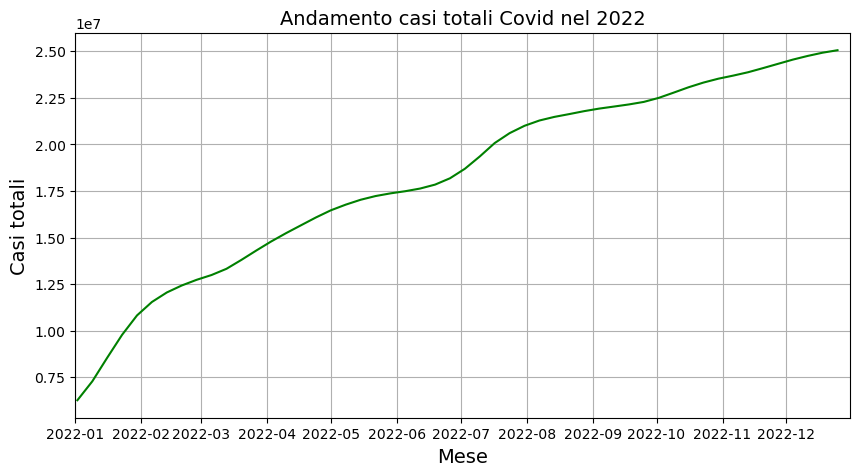

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(data = df_filtro_italia_2022, x = 'date', y = 'total_cases', color = "Green")
plt.title("Andamento casi totali Covid nel 2022", fontsize = 14)
plt.xlabel("Mese", fontsize = 14)
plt.ylabel("Casi totali", fontsize = 14)
plt.grid()
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")])

(18993.0, 19357.0)

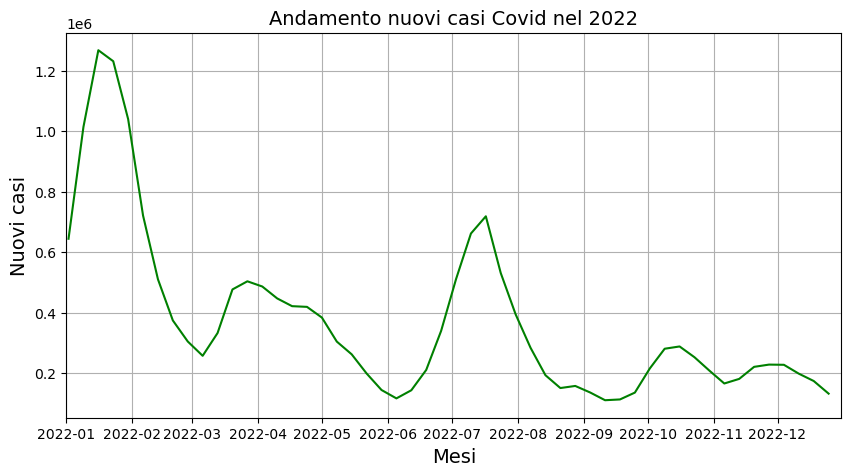

In [63]:
plt.figure(figsize=(10,5))

sns.lineplot(data = df_filtro_italia_2022, x = 'date', y = 'new_cases', color = "green")
plt.title("Andamento nuovi casi Covid nel 2022", fontsize = 14)
plt.xlabel("Mesi", fontsize = 14)
plt.ylabel("Nuovi casi", fontsize = 14)
plt.grid()
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")])     #così prenso tutti i mesi del 2022, perchè prima notavo che mi restituiva pure Gennaio 2023

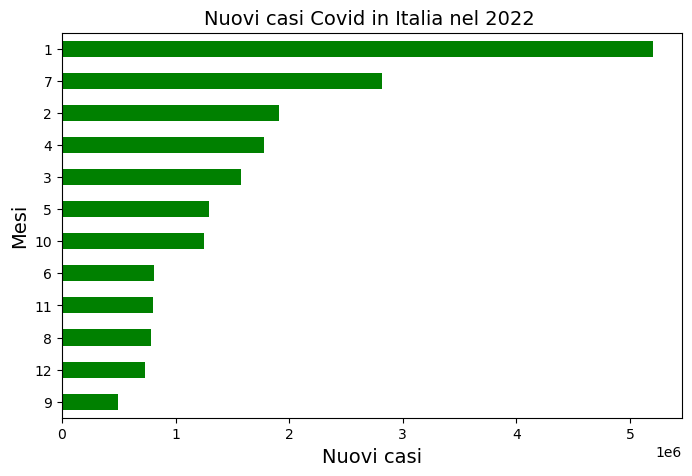

In [65]:
# qui ho deciso di visualizzare il numero di casi sempre in base al mese inserito per ordine crescente
plt.figure(figsize = (8, 5))
df_filtro_italia_2022.groupby(df_filtro_italia_2022["date"].dt.month)["new_cases"].sum().sort_values().plot(kind = "barh", color = "Green")     # rimane un settaggio dell'index momentaneo per la creazione del grafico.
plt.title("Nuovi casi Covid in Italia nel 2022 ", fontsize = 14)
plt.xlabel("Nuovi casi", fontsize = 14)
plt.ylabel("Mesi", fontsize = 14)
plt.show()




### Esercizio 4 ###

In [67]:
#qui, come spiegato precedentemente, sto filtrando il dataset e credando uno nuovo soltanto con le colonne che mi servono
filtro_ita_ger_fra = df_covid_n[((df_covid_n["location"] == "Italy") | (df_covid_n["location"] == "Germany") | (df_covid_n["location"] == "France")) &
(df_covid_n["date"] >= "2022-05-01") & (df_covid_n["date"] <= "2023-04-30")]
filtro_ita_ger_fra = filtro_ita_ger_fra[(filtro_ita_ger_fra["new_cases"] != 0) & (filtro_ita_ger_fra["new_cases"].notna())]
filtro_ita_ger_fra = filtro_ita_ger_fra.loc[:, ["iso_code","continent","location","date","new_cases","total_cases","icu_patients"]]
filtro_ita_ger_fra

,iso_code,continent,location,date,new_cases,total_cases,icu_patients
131214,FRA,Europe,France,2022-05-01,376510.0,27742592.0,1557.0
131221,FRA,Europe,France,2022-05-08,264928.0,28007520.0,1403.0
131228,FRA,Europe,France,2022-05-15,216715.0,28224235.0,1214.0
131235,FRA,Europe,France,2022-05-22,162239.0,28386474.0,1081.0
131242,FRA,Europe,France,2022-05-29,113355.0,28499829.0,1014.0
...,...,...,...,...,...,...,...
186458,ITA,Europe,Italy,2023-04-02,20999.0,25701147.0,88.0
186465,ITA,Europe,Italy,2023-04-09,19907.0,25721054.0,84.0
186472,ITA,Europe,Italy,2023-04-16,24746.0,25745800.0,90.0
186479,ITA,Europe,Italy,2023-04-23,26659.0,25772459.0,90.0


Text(0, 0.5, 'Numero pazienti')

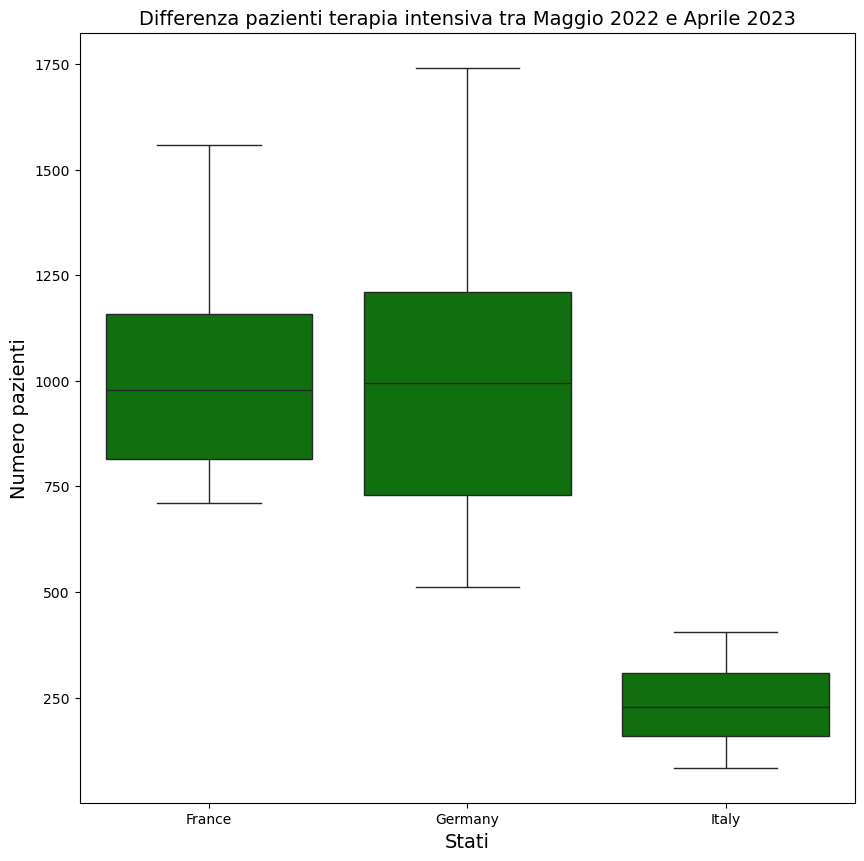

In [69]:
plt.figure(figsize=(10,10))
sns.boxplot(data = filtro_ita_ger_fra, x = "location", y="icu_patients", color = "green")
plt.title("Differenza pazienti terapia intensiva tra Maggio 2022 e Aprile 2023",fontsize = 14)
plt.xlabel("Stati", fontsize = 14)
plt.ylabel("Numero pazienti", fontsize = 14)

### Esercizio 5 ###

In [72]:
#qui sto creando delle variabili parlanti e successivamente creo una concatenzaione dei dataset filtrati
filtro_ita_21=df_covid_n[(df_covid_n["location"] == "Italy") & (df_covid_n["date"].dt.year == 2021)]
filtro_ger_21=df_covid_n[(df_covid_n["location"] == "Germany") & (df_covid_n["date"].dt.year == 2021)]
filtro_spa_21=df_covid_n[(df_covid_n["location"] == "Spain") & (df_covid_n["date"].dt.year == 2021)]
filtro_fra_21=df_covid_n[(df_covid_n["location"] == "France") & (df_covid_n["date"].dt.year == 2021)]

filtro_tot_21 = pd.concat([filtro_ita_21,filtro_ger_21,filtro_spa_21,filtro_fra_21])
filtro_tot_21

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
185637,ITA,Europe,Italy,2021-01-01,2039182.0,0.0,14385.714,71627.0,0.0,454.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185638,ITA,Europe,Italy,2021-01-02,2039182.0,0.0,14385.714,71627.0,0.0,454.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185639,ITA,Europe,Italy,2021-01-03,2141201.0,102019.0,14574.143,74985.0,3358.0,479.714,...,27.8,NaN,3.18,83.51,0.892,59037472,102036.91,15.58,17.4,1722.4229
185640,ITA,Europe,Italy,2021-01-04,2141201.0,0.0,14574.143,74985.0,0.0,479.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
185641,ITA,Europe,Italy,2021-01-05,2141201.0,0.0,14574.143,74985.0,0.0,479.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131089,FRA,Europe,France,2021-12-27,8709926.0,0.0,74248.571,124165.0,0.0,165.286,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131090,FRA,Europe,France,2021-12-28,8709926.0,0.0,74248.571,124165.0,0.0,165.286,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131091,FRA,Europe,France,2021-12-29,8709926.0,0.0,74248.571,124165.0,0.0,165.286,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
131092,FRA,Europe,France,2021-12-30,8709926.0,0.0,74248.571,124165.0,0.0,165.286,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN


In [74]:
#in questo blocco creo una sola riga di codice con un'unica variabile parlante dove attraverso il metodo .isin, che mi permette di filtrare gli stati che scirvo
# e l'operatore & ho lo stesso riusltato del blocco precedente
filtro_ita_ger_spa_fra = df_covid_n[(df_covid_n["location"].isin(["Spain", "Italy", "France", "Germany"])) & (df_covid_n["date"].dt.year == 2021)]
filtro_ita_ger_spa_fra = filtro_ita_ger_spa_fra.loc[: ,["iso_code","continent","location","date","new_cases","total_cases","hosp_patients"]]
filtro_ita_ger_spa_fra.isna().sum()   #controllo se ci sono valoti nulli

iso_code           0
continent          0
location           0
date               0
new_cases          0
total_cases        0
hosp_patients    365
dtype: int64

In [76]:
filtro_nulli_hosp=filtro_ita_ger_spa_fra[filtro_ita_ger_spa_fra["hosp_patients"].isna()]      
filtro_nulli_hosp.groupby("location")["hosp_patients"].sum()                           #raggryppando, capisco da dove provengono tutti i valori nulli


location
Germany    0.0
Name: hosp_patients, dtype: float64

In [78]:
filtro_ita_ger_spa_fra=filtro_ita_ger_spa_fra.dropna(subset = "hosp_patients")    #elimino i null nella colonna host_patients
filtro_ita_ger_spa_fra

,iso_code,continent,location,date,new_cases,total_cases,hosp_patients
130729,FRA,Europe,France,2021-01-01,0.0,2338258.0,24263.0
130730,FRA,Europe,France,2021-01-02,0.0,2338258.0,24458.0
130731,FRA,Europe,France,2021-01-03,88948.0,2427206.0,24780.0
130732,FRA,Europe,France,2021-01-04,0.0,2427206.0,24962.0
130733,FRA,Europe,France,2021-01-05,0.0,2427206.0,24871.0
...,...,...,...,...,...,...,...
363308,ESP,Europe,Spain,2021-12-27,0.0,6100138.0,8024.0
363309,ESP,Europe,Spain,2021-12-28,0.0,6100138.0,8580.0
363310,ESP,Europe,Spain,2021-12-29,0.0,6100138.0,8916.0
363311,ESP,Europe,Spain,2021-12-30,0.0,6100138.0,8982.0


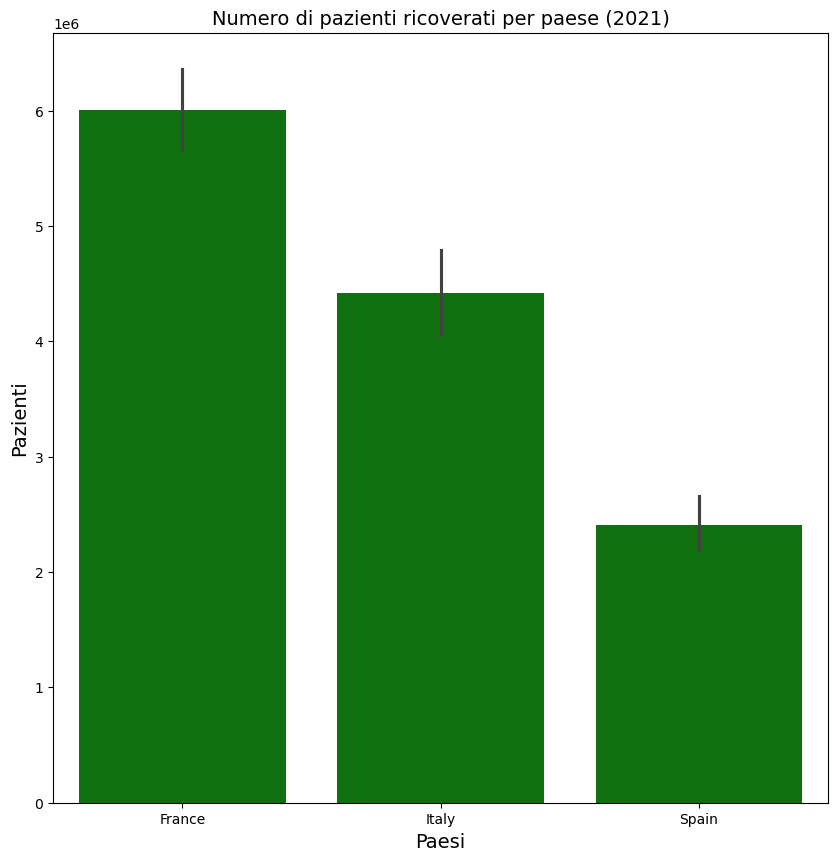

In [140]:
plt.figure(figsize=(10,10))
sns.barplot(filtro_ita_ger_spa_fra, x = "location", y = "hosp_patients", estimator = sum, color ="green")
plt.title("Numero di pazienti ricoverati per paese (2021)", fontsize = 14)
plt.xlabel("Paesi",fontsize = 14)                   
plt.ylabel("Pazienti", fontsize = 14)
plt.show()


In [80]:
filtro_ita_ger_spa_fra.groupby("location")["hosp_patients"].sum() #in questo modo riesco a visualizzare in maniera numericamnetnte dettagliata le differenze


location
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64

In [82]:
media_pazienti = filtro_ita_ger_spa_fra.groupby("location")["hosp_patients"].sum().mean()
print("La media dei pazienti osepdalizzati in queste città nel 2021 è",round(media_pazienti,2))

La media dei pazienti osepdalizzati in queste città nel 2021 è 4280124.33


In [84]:
# creare grafico mondiale: plus 

In [86]:
# import geopandas as gpd
# world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
# continent_cases = numero_casi_continenti.to_dict() 
# world["new_cases"] = world["continent"].map(continent_cases)
# world.plot(column="new_cases", cmap="Reds", legend=True)
# plt.title("Numero di nuovi casi per continente (2021)")
# plt.show()

# Ho provato a crerae un grafico mondiale ma mi ha dato un problema nel caricamento della libreria geopandas dicendomi che non esiete più